# Google Stock Prediction using ML

In [14]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib. pyplot as plt
import matplotlib
from sklearn. preprocessing import MinMaxScaler
from keras. layers import LSTM, Dense, Dropout
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib. dates as mandates
from sklearn. preprocessing import MinMaxScaler
from sklearn import linear_model
from keras. models import Sequential
from keras. layers import Dense
import keras. backend as K
from keras. callbacks import EarlyStopping
from keras. optimizers import adam
from keras. models import load_model
from keras. layers import LSTM
from keras. utils.vis_utils import plot_model


In [15]:
df=pd.read_csv('/content/drive/MyDrive/ZOMATO.NS.csv',index_col='Date',parse_dates=True,infer_datetime_format=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-07-26,126.349998,143.750000,125.300003,140.649994,140.649994,249723854
2021-07-27,141.699997,147.800003,127.750000,132.899994,132.899994,240341900
2021-07-28,131.000000,135.000000,123.550003,131.199997,131.199997,159793731
2021-07-29,134.949997,144.000000,132.199997,141.550003,141.550003,117973089
2021-07-30,142.600006,142.699997,131.000000,133.500000,133.500000,88312522


In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<Axes: xlabel='Date'>

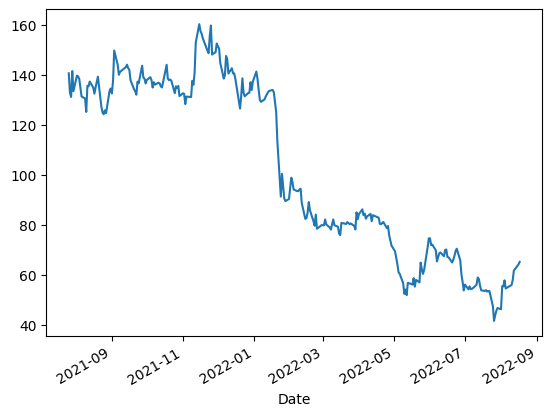

In [17]:
df['Adj Close'].plot()


## Normalizing the Dataset

In [18]:
output_var = pd.DataFrame(df['Adj Close'])

features = ['Open','High','Low','Volume']

In [19]:
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(df[features])
feature_transform= pd.DataFrame(columns=features, data=feature_transform, index=df.index)
feature_transform.head()

,Open,High,Low,Volume
Date,,,,
2021-07-26,0.710723,0.797352,0.745271,0.412404
2021-07-27,0.838321,0.829856,0.766828,0.396651
2021-07-28,0.749377,0.727127,0.729872,0.261409
2021-07-29,0.782211,0.799358,0.805983,0.191192
2021-07-30,0.845802,0.788925,0.795425,0.141391


In [20]:
timesplit= TimeSeriesSplit(n_splits=10)
for train_index, test_index in timesplit.split(feature_transform):
        X_train, X_test = feature_transform[:len(train_index)], feature_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = output_var[:len(train_index)].values.ravel(), output_var[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [21]:
trainX =np.array(X_train)
testX =np.array(X_test)
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])

print(X_test.shape)



regressor = Sequential()

regressor.add(LSTM(units = 64, return_sequences=True, input_shape = (1,X_test.shape[2]),activation='relu'))
regressor.add(LSTM(units = 64, return_sequences=False, activation='relu'))

regressor.add(Dense(1))




(24, 1, 4)


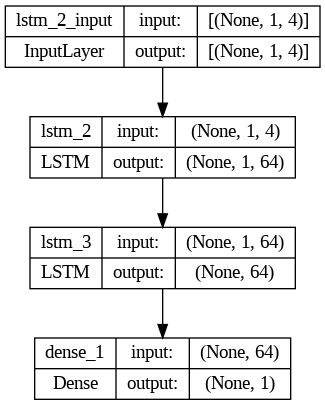

In [22]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
plot_model(regressor,show_shapes=True,show_layer_names=True)

In [23]:
history=regressor.fit(X_train, y_train, epochs=100, batch_size=8, verbose=1, shuffle=False)


Epoch 1/100
31/31 [==============================] - 4s 10ms/step - loss: 12584.9102
Epoch 2/100
31/31 [==============================] - 0s 8ms/step - loss: 12557.0986
Epoch 3/100
31/31 [==============================] - 0s 9ms/step - loss: 12473.5039
Epoch 4/100
31/31 [==============================] - 0s 8ms/step - loss: 12168.2148
Epoch 5/100
31/31 [==============================] - 0s 9ms/step - loss: 11113.9424
Epoch 6/100
31/31 [==============================] - 0s 9ms/step - loss: 8626.3594
Epoch 7/100
31/31 [==============================] - 0s 9ms/step - loss: 5157.4692
Epoch 8/100
31/31 [==============================] - 0s 9ms/step - loss: 2006.1632
Epoch 9/100
31/31 [==============================] - 0s 10ms/step - loss: 381.4920
Epoch 10/100
31/31 [==============================] - 0s 8ms/step - loss: 132.2057
Epoch 11/100
31/31 [==============================] - 0s 8ms/step - loss: 139.6710
Epoch 12/100
31/31 [==============================] - 0s 9ms/step - loss: 129.862

In [24]:
y_pred= regressor.predict(X_test)


1/1 [==============================] - 0s 269ms/step


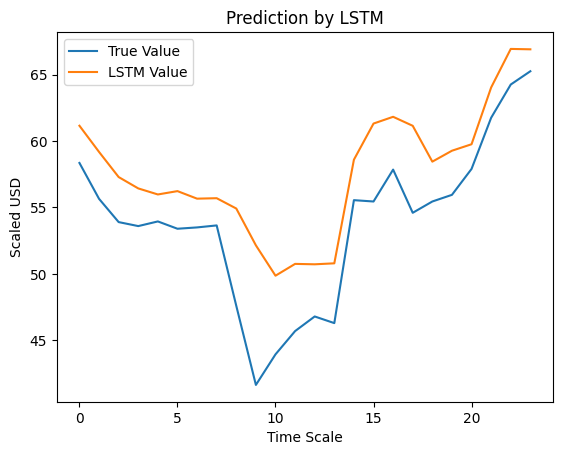

In [25]:
plt.plot(y_test, label='True Value')
plt.plot(y_pred, label='LSTM Value')
plt.title('Prediction by LSTM')
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.legend()
plt.show()